# Exercício de Programação 01

**Nome:** Deivison rodrigues jordão

**matricula:** 20200023728

**Diciplina:** Aprendizagem de máquina

## Implementação do perceptron

### Importando Bibliotecas

In [40]:
import numpy as np
from random import *
import matplotlib.pyplot as plt

### Preparando os Dados

In [41]:
#inicializando o gerador de números aleatórios para ter reprodutividade no futuro
seed(5)

#Criando o Dataset
X = [] 

for i in range(1000):
    X_aux = []
    X_aux.append(uniform(-1,1))
    X_aux.append(uniform(-1,1))
    X.append(X_aux)
    
X = np.array(X)

#VIsualizando o Dataset
print(X)

[[ 0.24580339  0.48357398]
 [ 0.59038713  0.88490057]
 [ 0.47979715  0.84464999]
 ...
 [-0.55988832  0.21965358]
 [ 0.91302774  0.18153037]
 [-0.70124967 -0.59512236]]


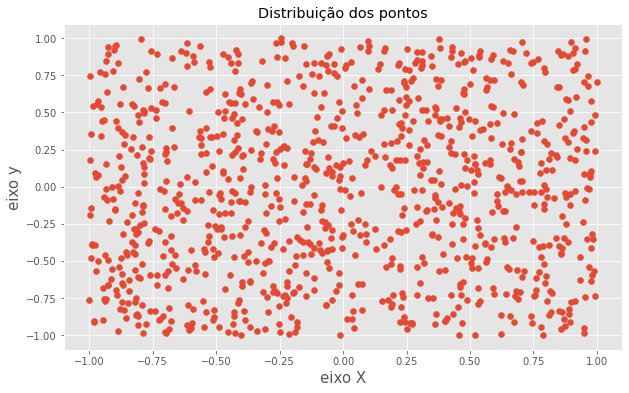

In [42]:
#VIsualizando o Dataset

Xx, Xy = zip(*X)

#Visualizando reta alvo
plt.figure(figsize=(10, 6))
plt.title('Distribuição dos pontos')
plt.xlabel('eixo X', fontsize=15)
plt.ylabel('eixo y', fontsize=15)
plt.scatter(Xx, Xy)
plt.grid(True)
plt.show()

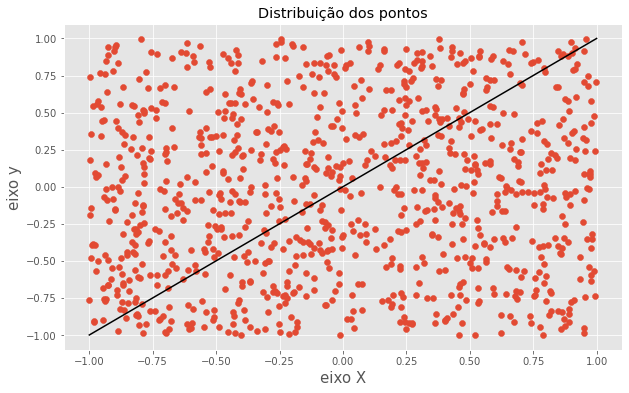

In [43]:
#Definindo função alvo (reta que mapeará os pontos em +1 e -1)

a,b = 1,0 #Definindo coeficiente angular e linear

f = lambda x: a*x + b

#Visualizando reta alvo
plt.figure(figsize=(10, 6))
plt.title('Distribuição dos pontos')
plt.xlabel('eixo X', fontsize=15)
plt.ylabel('eixo y', fontsize=15)
plt.scatter(Xx, Xy)
plt.plot([-1, 1],[f(-1), f(1)],color = 'black') #considerando a=1 e b=0
plt.grid(True)
plt.show()

In [44]:
#Classificando o dataset em -1 e 1 diacordo com a reta alvo

target = []

for i in range(1000):
    x = Xx[i]
    y = Xy[i]
    if a*x + b > y:
        target.append(1)
    else:
        target.append(-1)

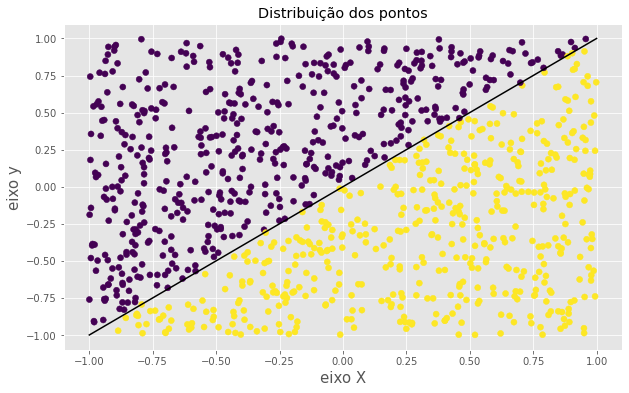

In [45]:
#Visualizando classificação
plt.figure(figsize=(10, 6))
plt.title('Distribuição dos pontos')
plt.xlabel('eixo X', fontsize=15)
plt.ylabel('eixo y', fontsize=15)
plt.scatter(Xx, Xy, c=target)
plt.plot([-1, 1],[f(-1), f(1)],color = 'black') #considerando a=1 e b=0
plt.grid(True)
plt.show()

### PLA (Perceptron Learning Algorithm)

In [46]:
#Dividindo os dados para Treinamento e Teste
#Interpretei que o "N" sitado na atividade se referia ao tamanho da entrada e "d" a quantidade de pesos
X_train = X[:10]
X_train2 = X[10:110]
X_test = X[110:]
target_correct = target
target_correct_train = target_correct[:10]
target_correct_train2 = target_correct[10:110]

In [47]:
def test_hipotese(w,X): #Testa hipotese e retorna a clasificação dos pontos resultante.
    
    #Classificando o dataset em -1 e 1 diacordo com a reta hipotese
    
    Xx, Xy = zip(*X)
    target = []
    for i in range(len(X)):
        x = Xx[i]
        y = Xy[i]
        if w[0]*x + w[1]*y > 0:
            target.append(1)
        else:
            target.append(-1)

    #Visualizando classificação
    plt.figure(figsize=(10, 6))
    plt.title('Distribuição dos pontos')
    plt.xlabel('eixo X', fontsize=15)
    plt.ylabel('eixo y', fontsize=15)
    plt.scatter(Xx, Xy, c=target)
    a = w[0]/w[1] if w[1] else 0
    plt.plot([-1, 1],[0+a, 0-a],color = 'blue') #considerando a=w[0] e b= w[1]
    plt.plot([-1, 1],[f(-1), f(1)],color = 'black') #considerando a=1 e b=0
    plt.grid(True)
    plt.show()
    
    return target

In [48]:
def builder_ICP(w,X,target_correct): #contrutor da lista de pontos classificados incorretamente
    
    list_index = []
    ICP = []
    
    class_hip = test_hipotese(w,X)
    
    for i in range(len(target_correct)):
        if target_correct[i] !=  class_hip[i]:
            list_index.append(i)
            
    for i in list_index:
        ICP.append(X[i])
        
    return ICP

In [49]:
def correct_class(X):
    x = X[0]
    y = X[1]
    if 1*x + 0 > y:
        return 1
    else:
        return -1

In [50]:
def PLA(X,target_correct):
    w = np.zeros(2) #Pesos iniciando em zero
    w_sum = []
    w_sum2 = 0
    # Lista de pontos classificados incorretamente
    ICP = builder_ICP(w,X,target_correct)
    
    while(len(ICP) > 0):
        rand_ICP = choice(ICP) #escolhe um ponto ICP aleatorio
        for i in rand_ICP:
            w_sum.append(correct_class(rand_ICP) * i)
        w_sum2 = w
        w = []
        for i in range(len(w_sum)):
            w.append(w_sum2[i] + w_sum[i])
        w_sum = []
        ICP = builder_ICP(w,X,target_correct)
    return w

### Testando as funções

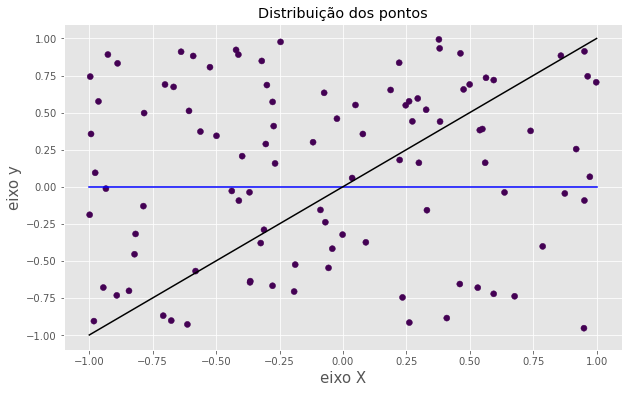

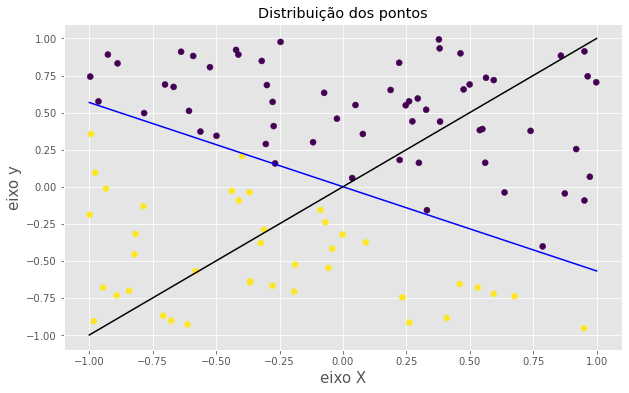

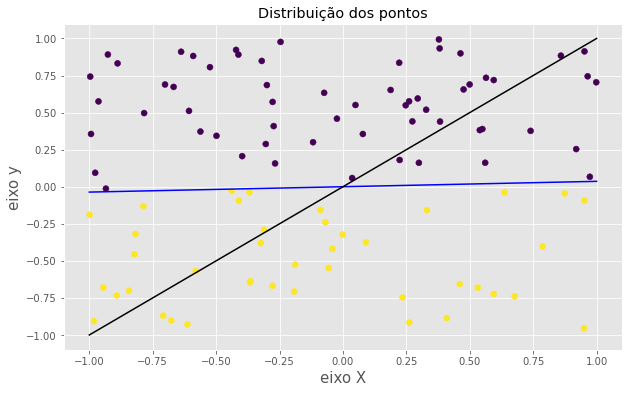

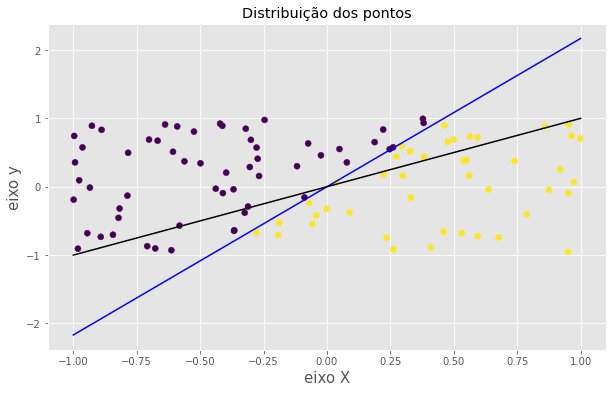

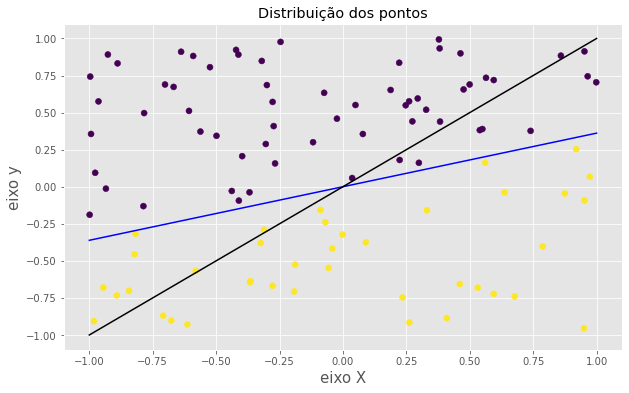

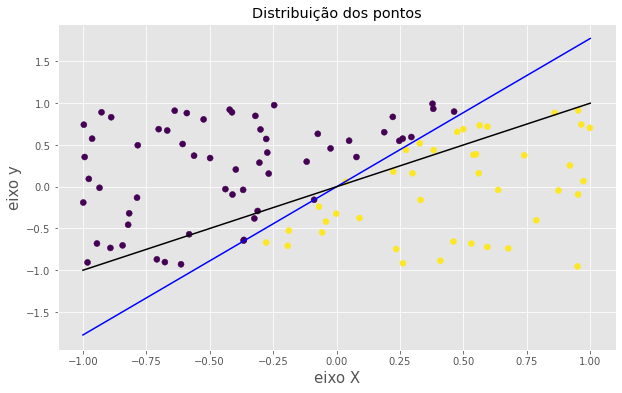

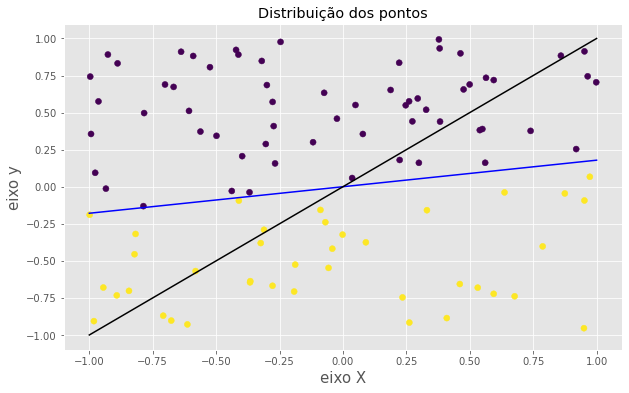

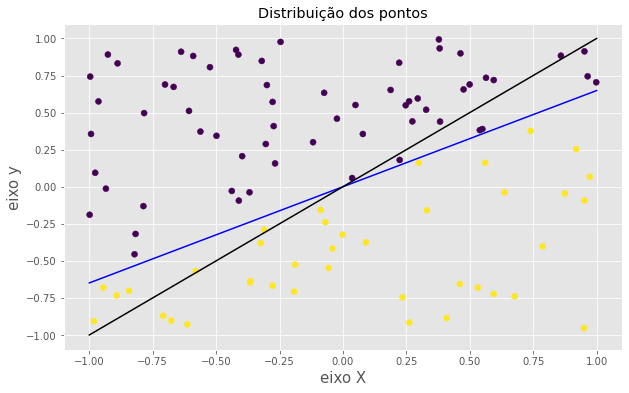

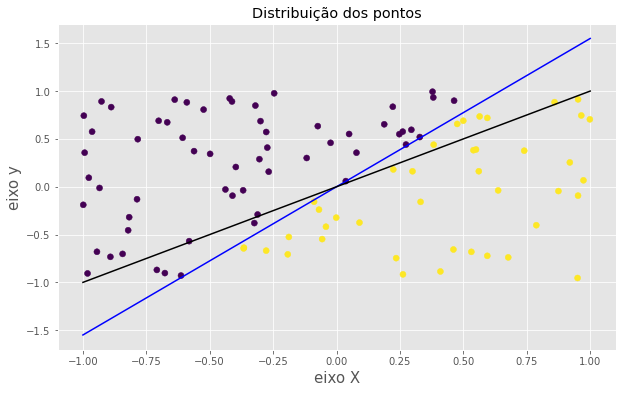

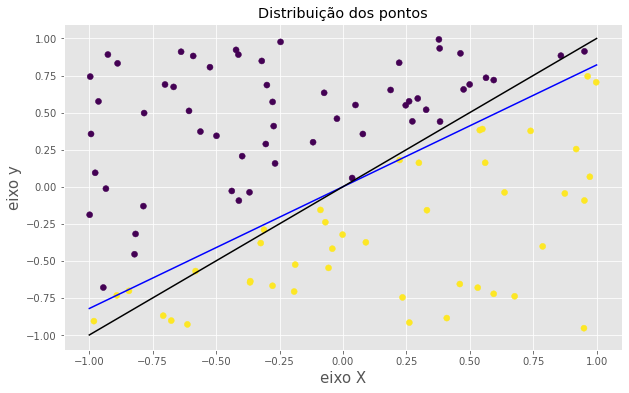

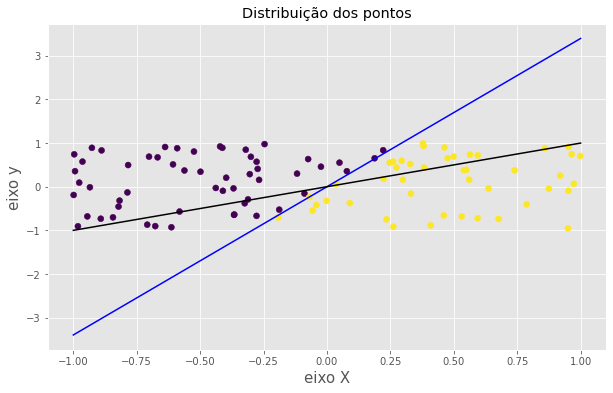

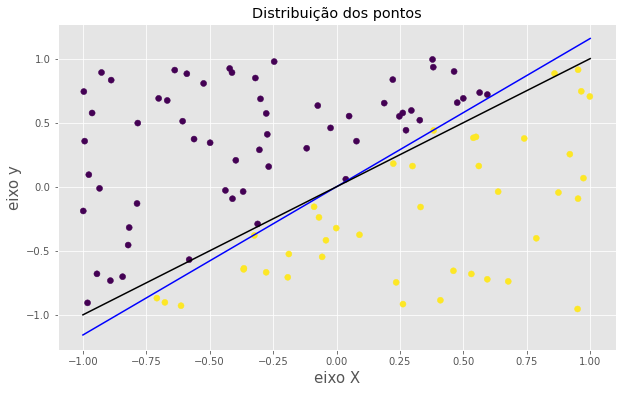

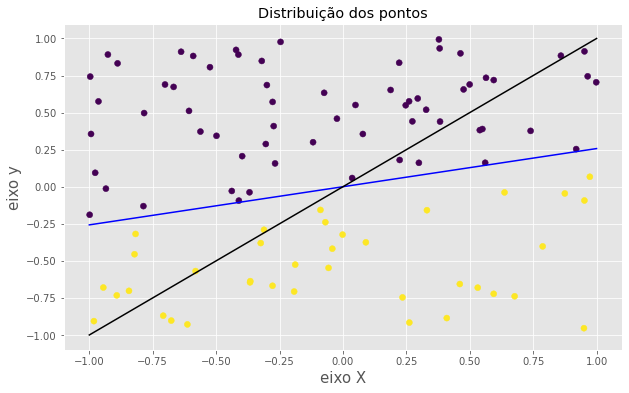

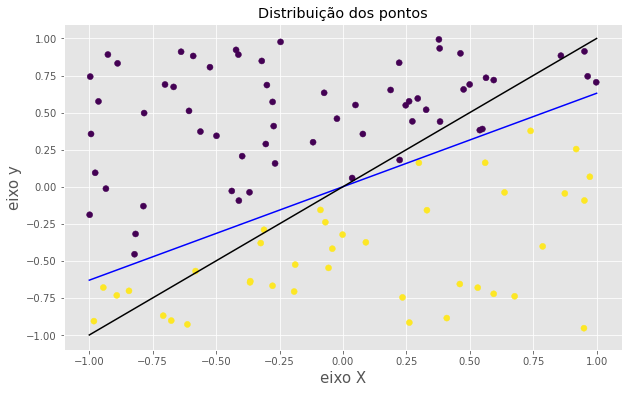

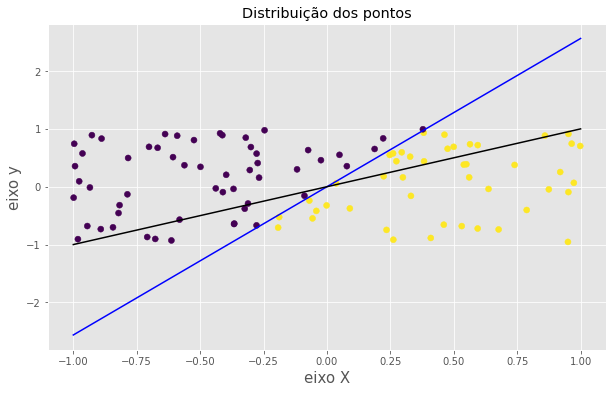

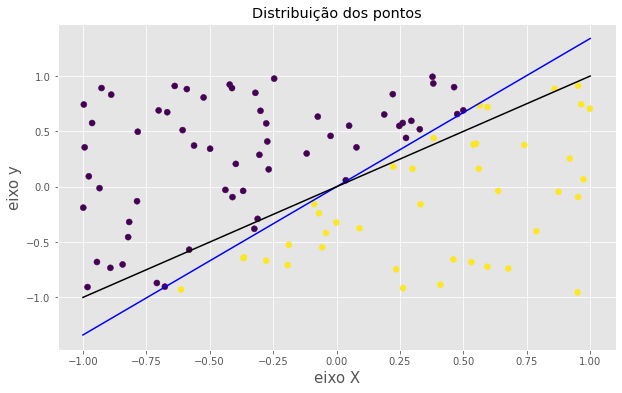

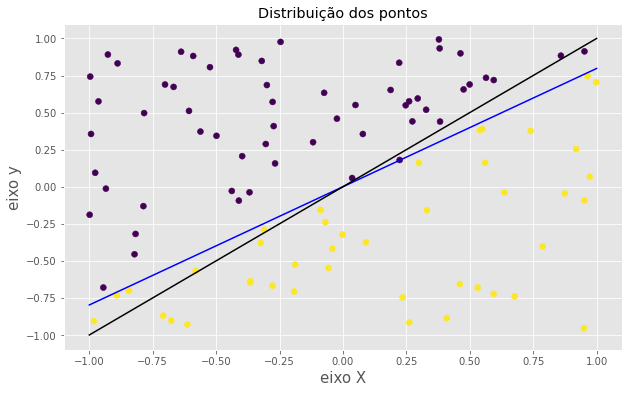

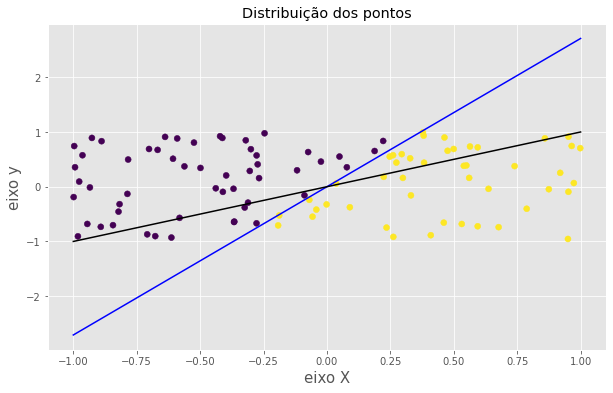

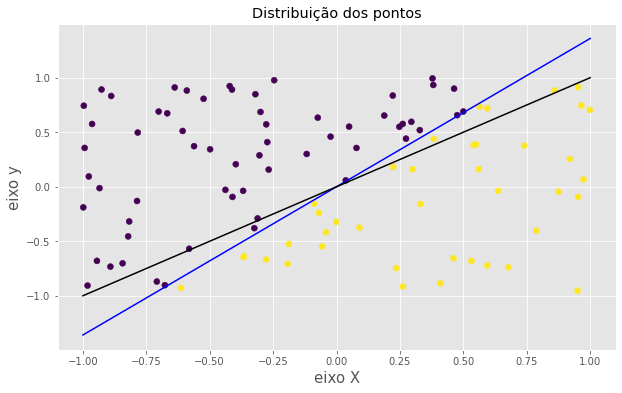

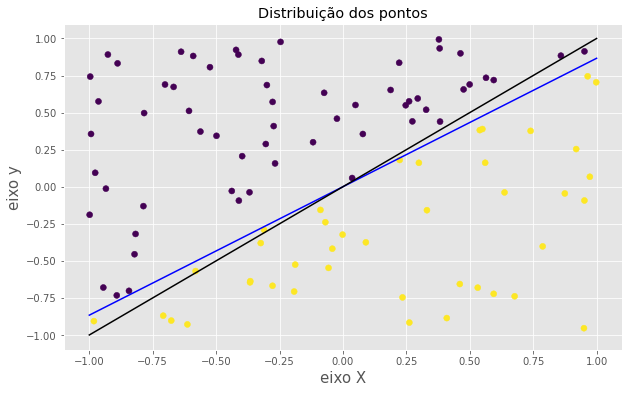

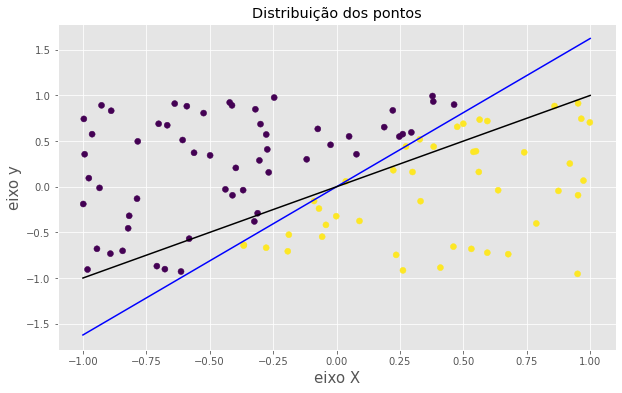

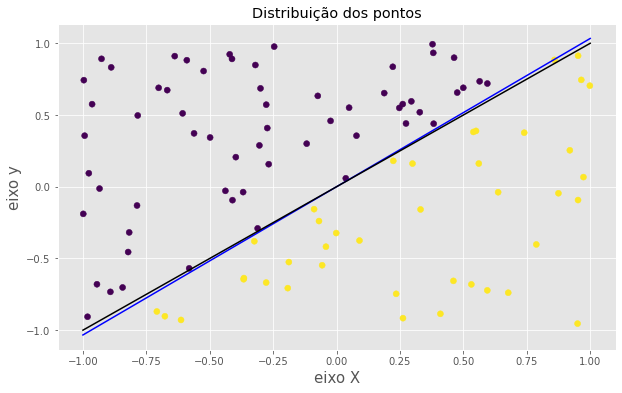

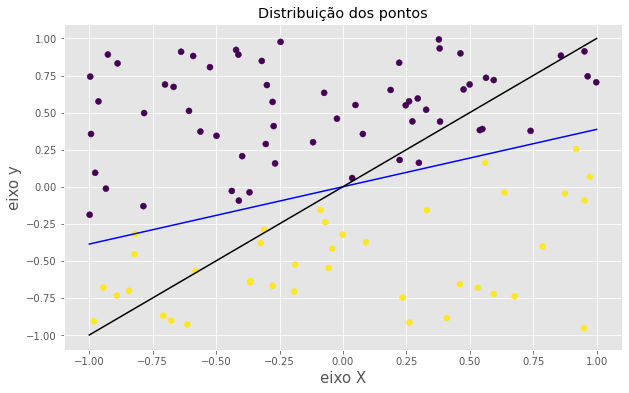

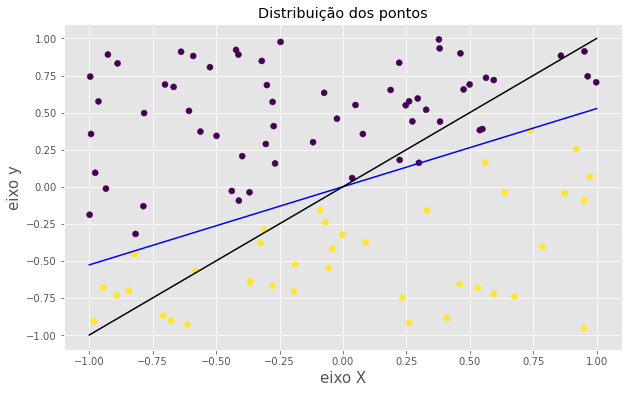

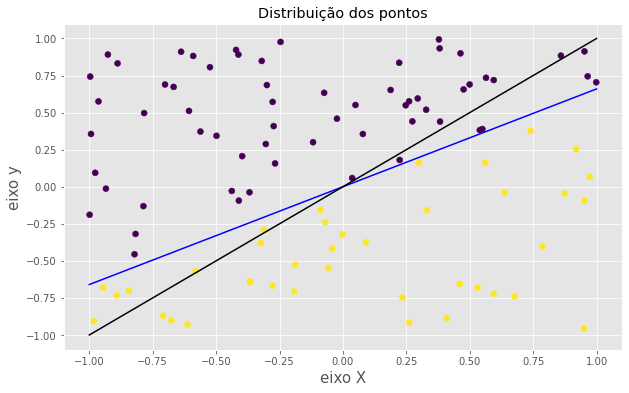

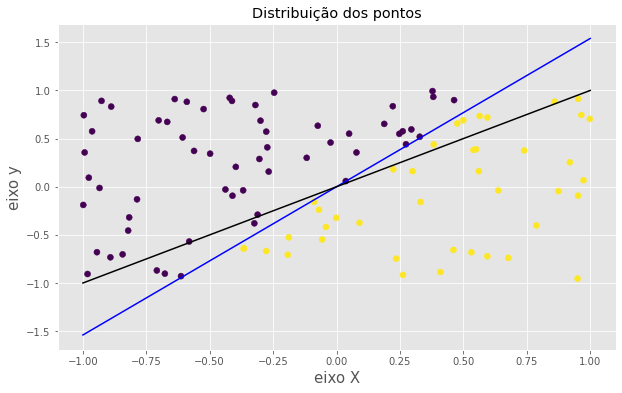

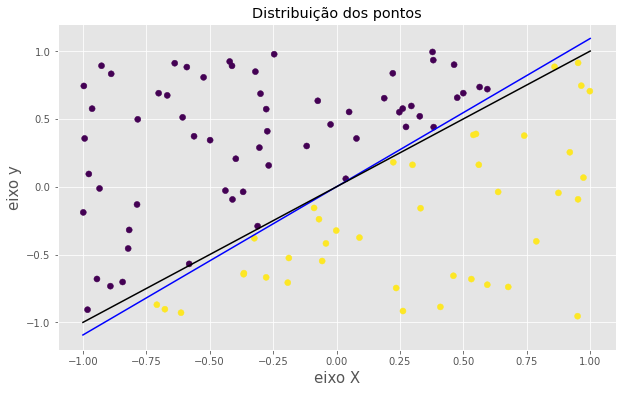

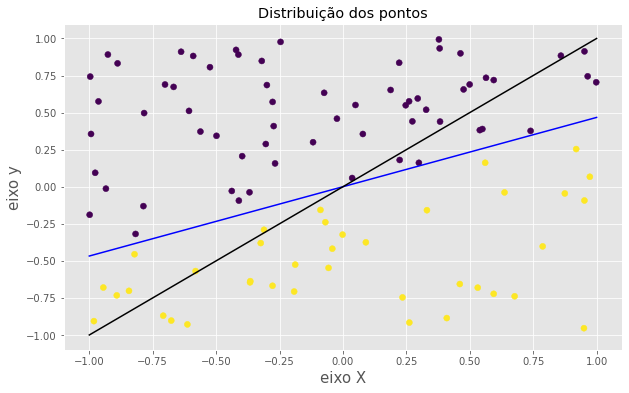

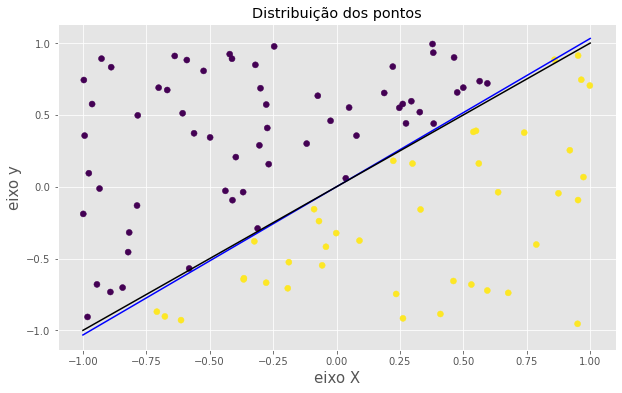

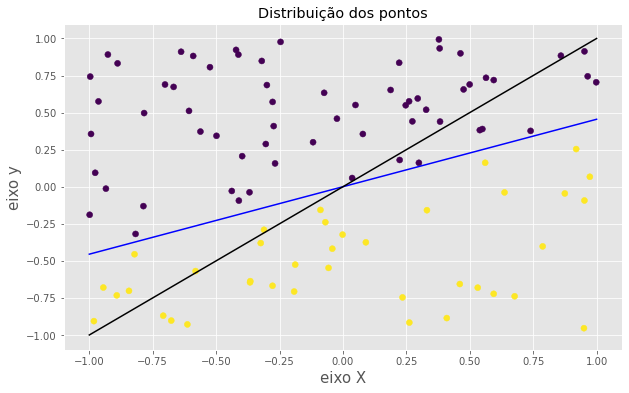

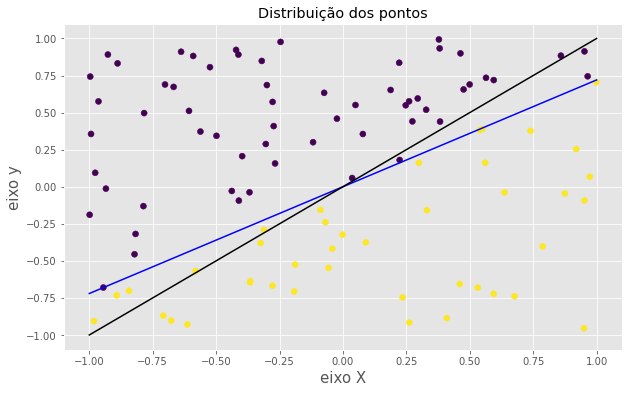

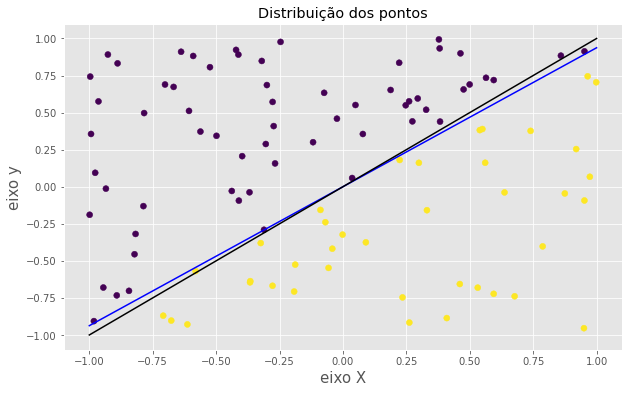

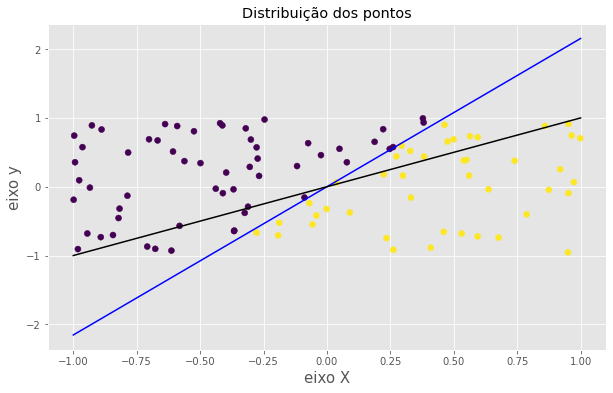

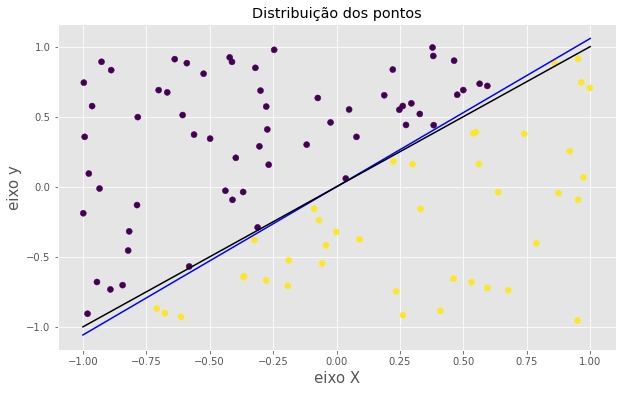

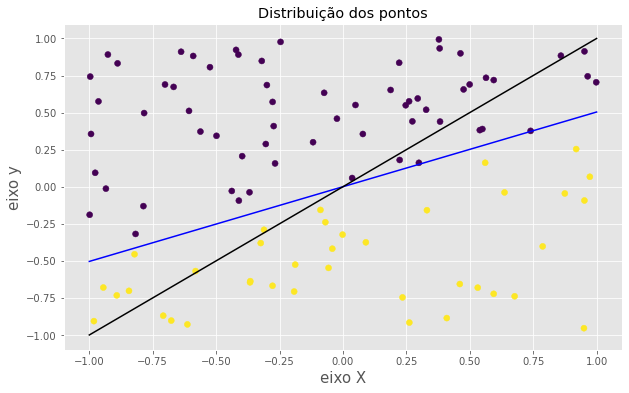

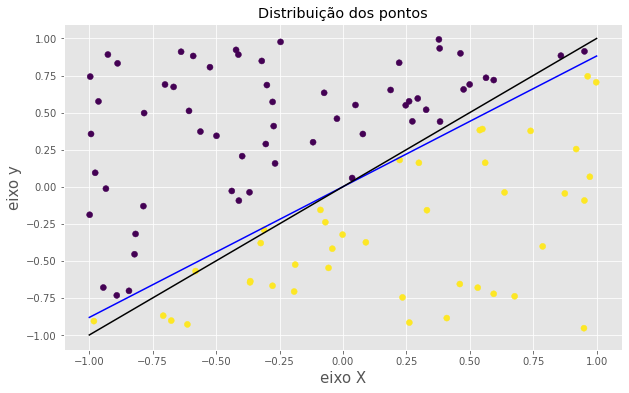

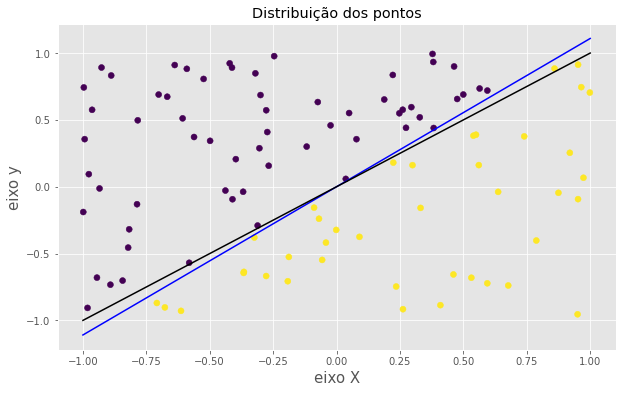

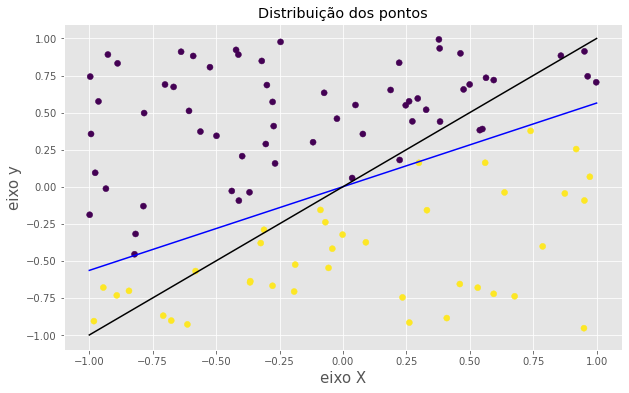

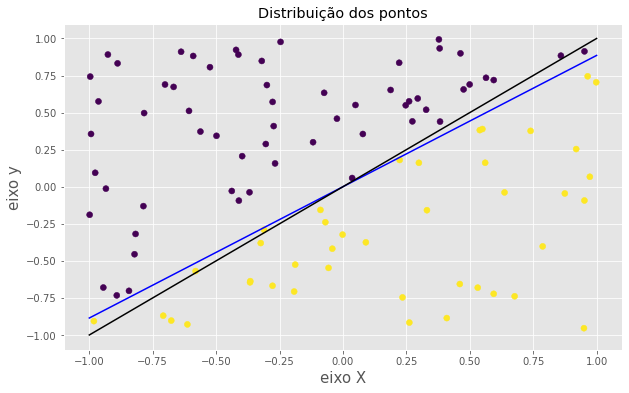

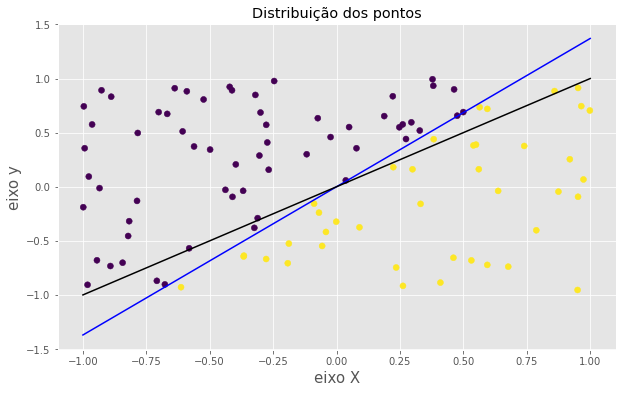

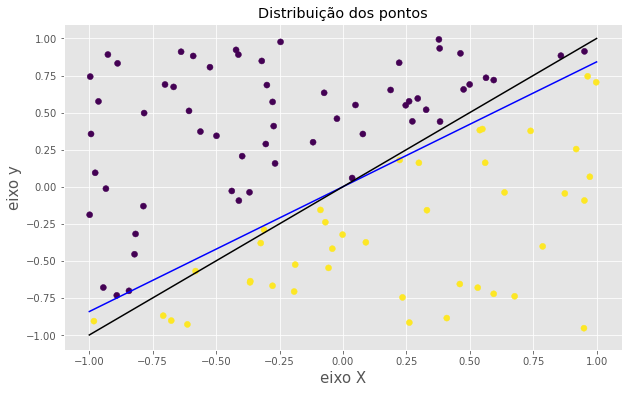

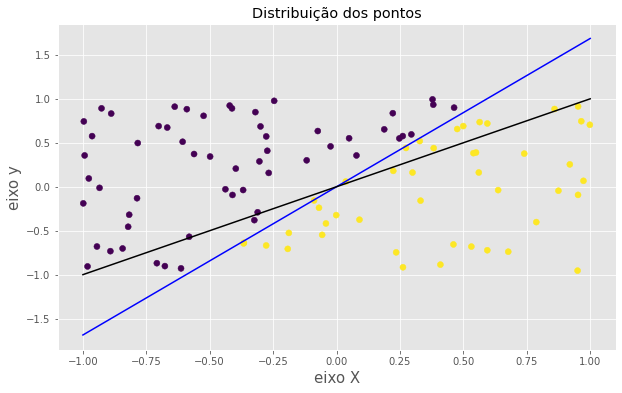

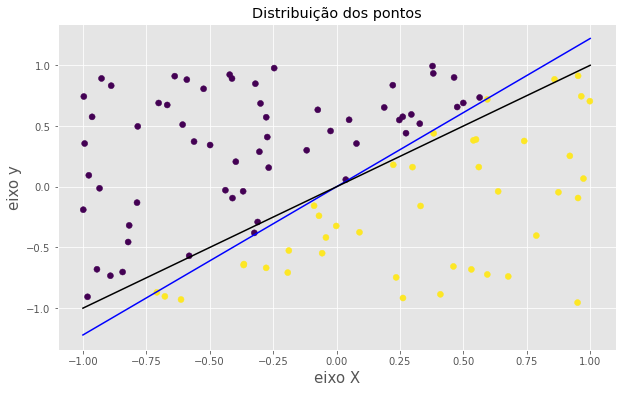

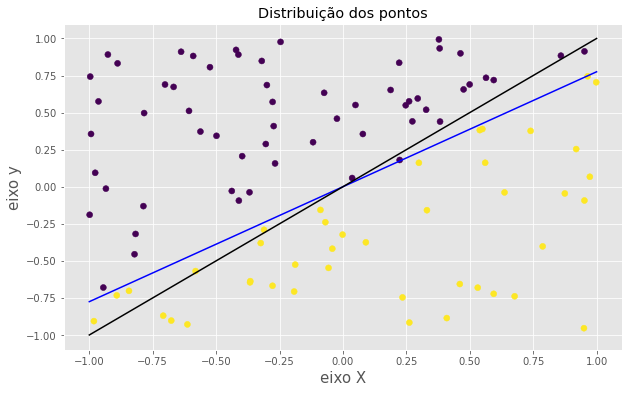

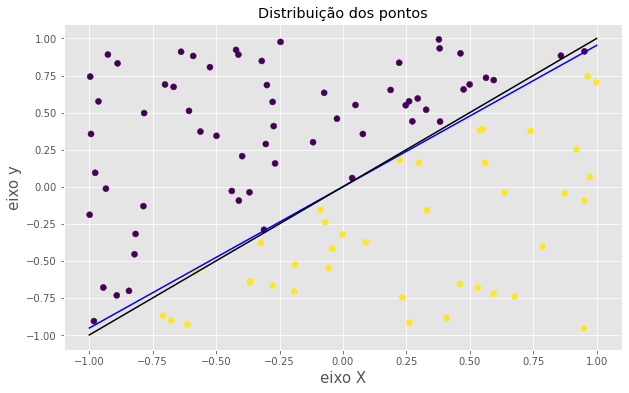

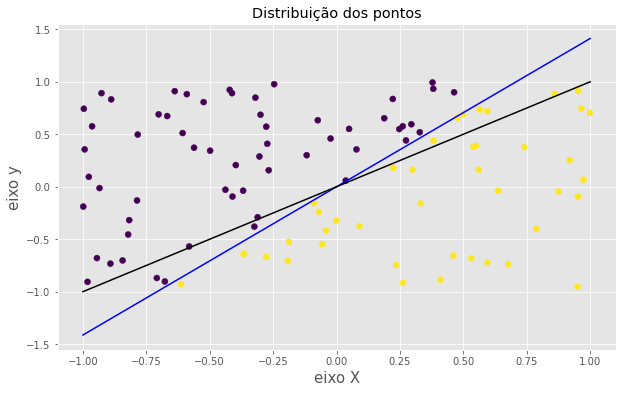

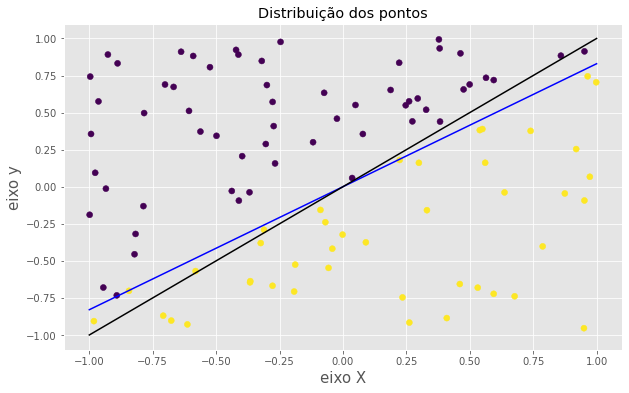

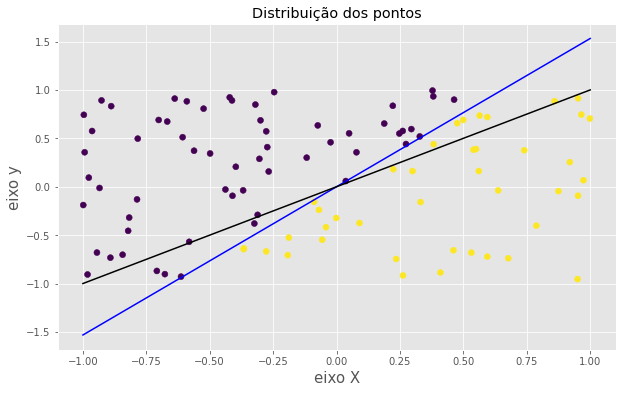

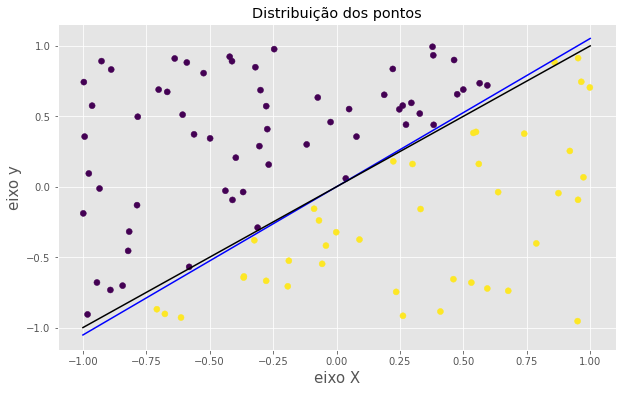

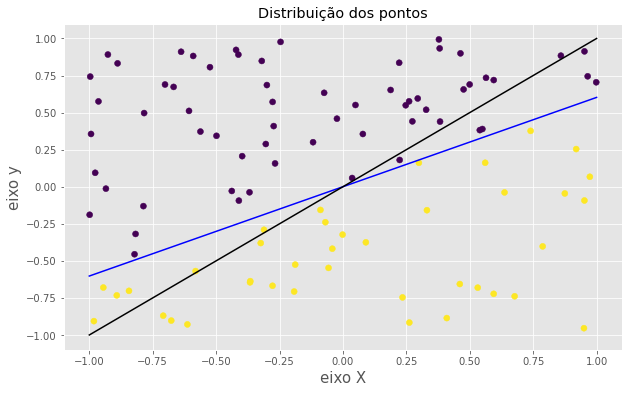

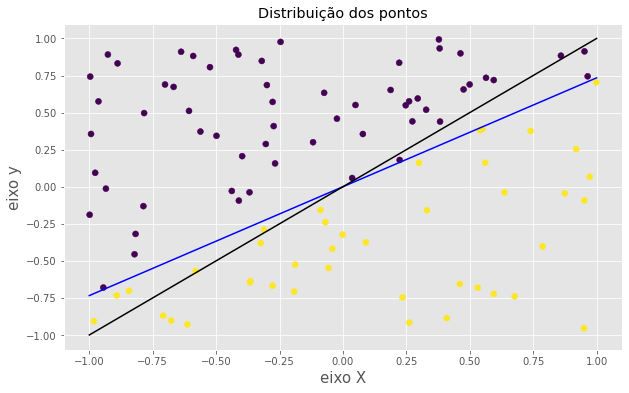

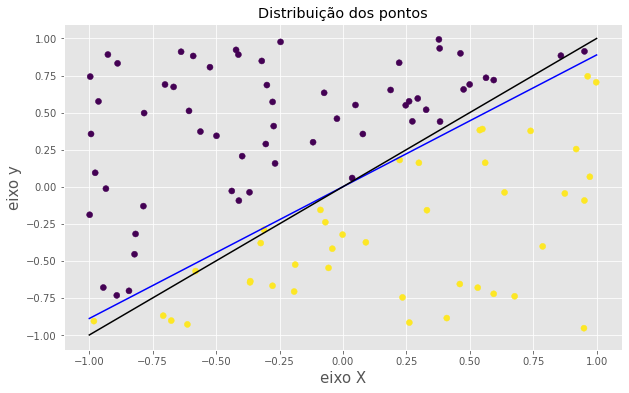

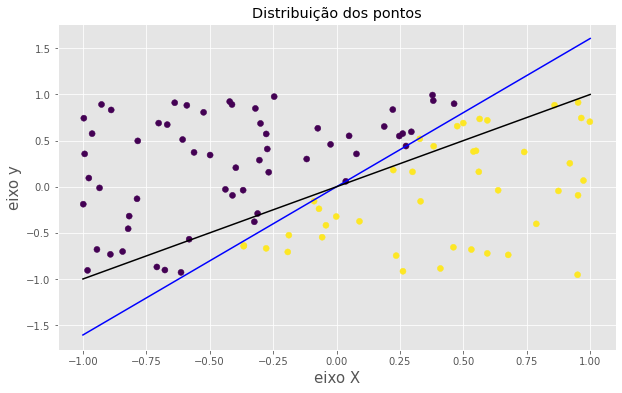

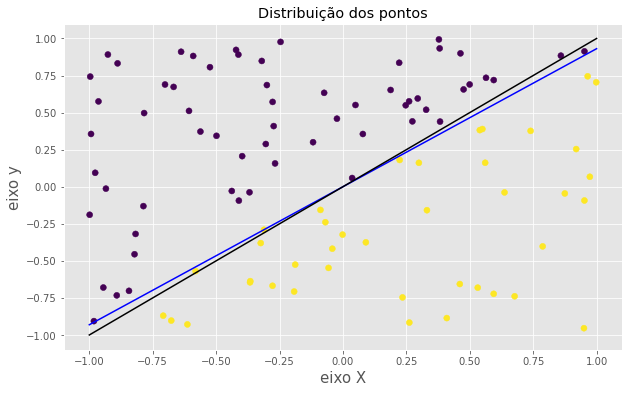

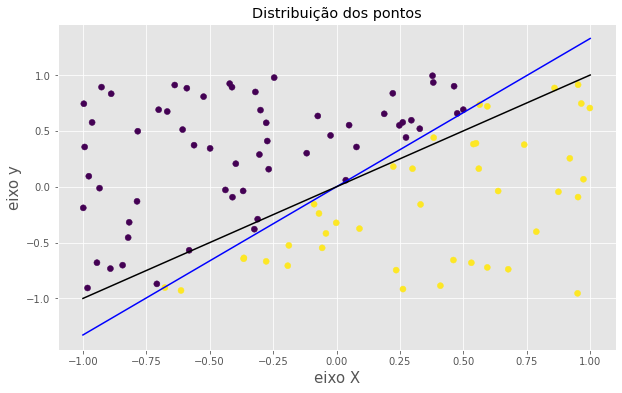

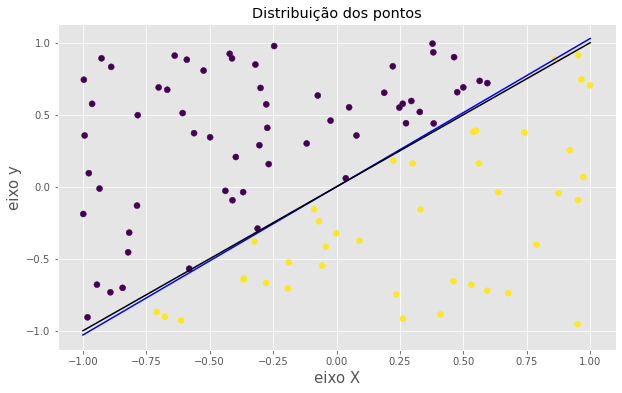

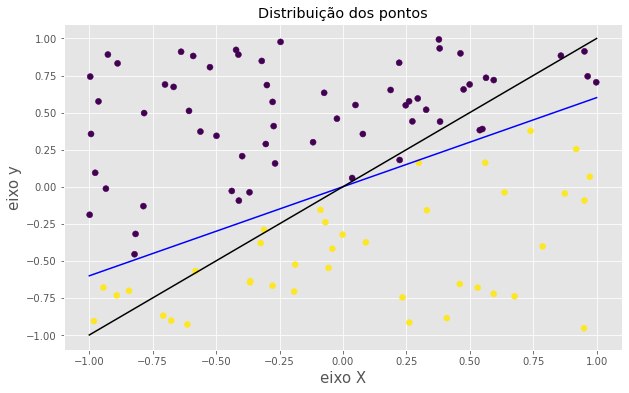

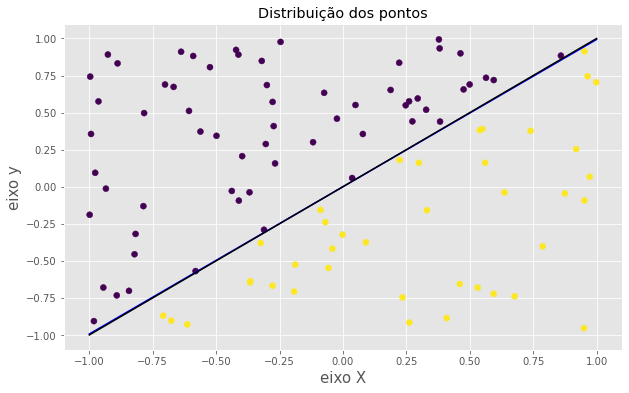

[3.371213378085342, -3.3947442714699188]

In [51]:
PLA(X_train2,target_correct_train2)